In [1]:
library(readxl)

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
library(lfe)

Loading required package: Matrix



In [4]:
df = read_xlsx("../data/GAINS/GHGemis_vs_PM25_conc_GAINS_countries_regions_v2.xlsx", sheet=1)

In [5]:
unique(df$IDYEARS)

[1] 2020 2025 2030 2035 2040 2045 2050

In [6]:
head(df)

IDSCENARIOS,IDYEARS,REGION_4LETTER,REGION_4LETTER_LABEL,POP,GDP,GDP_PPP,EMIS_CO2_KT,EMIS_CH4_KT,PM25_ANTHROP,PM25_TOTAL
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Baseline,2020,AFGH,Afghanistan,38054941,9.289786,22.48262,23451.44,712.67,42.63,57.29
Baseline,2020,ALBA,Albania,2942034,11.301931,24.96461,4688.82,150.49,16.50,17.96
Baseline,2020,ARGE,Argentina,45510399,242.398694,510.02911,138696.29,5964.82,3.37,5.59
Baseline,2020,ARME,Armenia,2938679,10.762538,28.98772,6692.76,86.93,10.04,13.67
Baseline,2020,AUST,Austria,8782210,353.917177,317.53936,60160.62,222.75,9.37,9.71
Baseline,2020,AUTR,Australia,25398177,986.870189,907.28794,371354.65,4983.79,2.43,3.96


In [7]:
unique(df$IDSCENARIOS)

[1] "Baseline" "Decarb"

In [8]:
df$GDPPC_PPP = df$GDP_PPP / df$POP

In [9]:
summary(felm(PM25_ANTHROP ~ EMIS_CO2_KT + EMIS_CH4_KT + GDPPC_PPP | factor(IDYEARS) + REGION_4LETTER, data=df))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or not positive definite”



Call:
   felm(formula = PM25_ANTHROP ~ EMIS_CO2_KT + EMIS_CH4_KT + GDPPC_PPP |      factor(IDYEARS) + REGION_4LETTER, data = df) 

Residuals:
    Min      1Q  Median      3Q     Max 
-28.166  -2.007   0.000   2.074  29.793 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
EMIS_CO2_KT -8.563e-07  5.582e-07  -1.534    0.125    
EMIS_CH4_KT  9.133e-04  8.440e-05  10.821   <2e-16 ***
GDPPC_PPP    8.734e+03  1.124e+04   0.777    0.437    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.975 on 1058 degrees of freedom
Multiple R-squared(full model): 0.6451   Adjusted R-squared: 0.6079 
Multiple R-squared(proj model): 0.1506   Adjusted R-squared: 0.06145 
F-statistic(full model):17.32 on 111 and 1058 DF, p-value: < 2.2e-16 
F-statistic(proj model): 0.2014 on 3 and 1058 DF, p-value: 0.8954 



In [10]:
summary(felm(log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) | factor(IDYEARS) + REGION_4LETTER, data=df))


Call:
   felm(formula = log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) |      factor(IDYEARS) + REGION_4LETTER, data = df) 

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74938 -0.19194  0.01856  0.19418  2.12580 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
log(EMIS_CO2_KT)  0.60345    0.02022   29.85   <2e-16 ***
log(EMIS_CH4_KT)  0.70432    0.03263   21.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3361 on 1059 degrees of freedom
Multiple R-squared(full model): 0.8789   Adjusted R-squared: 0.8663 
Multiple R-squared(proj model): 0.7168   Adjusted R-squared: 0.6874 
F-statistic(full model):69.86 on 110 and 1059 DF, p-value: < 2.2e-16 
F-statistic(proj model):  1340 on 2 and 1059 DF, p-value: < 2.2e-16 



In [11]:
summary(felm(log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) + log(GDPPC_PPP) | factor(IDYEARS) + REGION_4LETTER, data=df))


Call:
   felm(formula = log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) +      log(GDPPC_PPP) | factor(IDYEARS) + REGION_4LETTER, data = df) 

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7852 -0.1915  0.0127  0.1903  2.1432 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
log(EMIS_CO2_KT)  0.60849    0.02021  30.112   <2e-16 ***
log(EMIS_CH4_KT)  0.70066    0.03253  21.541   <2e-16 ***
log(GDPPC_PPP)   -0.20972    0.06920  -3.031   0.0025 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3348 on 1058 degrees of freedom
Multiple R-squared(full model): 0.8799   Adjusted R-squared: 0.8673 
Multiple R-squared(proj model): 0.7192   Adjusted R-squared: 0.6898 
F-statistic(full model):69.85 on 111 and 1058 DF, p-value: < 2.2e-16 
F-statistic(proj model): 903.4 on 3 and 1058 DF, p-value: < 2.2e-16 



In [12]:
df$loggdppc = log(df$GDPPC_PPP)
df$loggdppc2 = df$loggdppc^2

In [13]:
summary(felm(log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) + loggdppc + loggdppc2 | factor(IDYEARS) + REGION_4LETTER, data=df))


Call:
   felm(formula = log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) +      loggdppc + loggdppc2 | factor(IDYEARS) + REGION_4LETTER,      data = df) 

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71672 -0.18172  0.00289  0.18436  2.07217 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
log(EMIS_CO2_KT)  0.62856    0.01991  31.575  < 2e-16 ***
log(EMIS_CH4_KT)  0.69735    0.03174  21.968  < 2e-16 ***
loggdppc          1.94446    0.30068   6.467 1.53e-10 ***
loggdppc2         0.10341    0.01407   7.352 3.90e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3267 on 1057 degrees of freedom
Multiple R-squared(full model): 0.8858   Adjusted R-squared: 0.8737 
Multiple R-squared(proj model): 0.7329   Adjusted R-squared: 0.7046 
F-statistic(full model):73.18 on 112 and 1057 DF, p-value: < 2.2e-16 
F-statistic(proj model): 725.1 on 4 and 1057 DF, p-value: < 2.2e-16 



In [14]:
df$year2000 <- df$IDYEARS - 2000

In [15]:
summary(felm(log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) + log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc + loggdppc2 | factor(IDYEARS) + REGION_4LETTER, data=df))


Call:
   felm(formula = log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) +      log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc +      loggdppc2 | factor(IDYEARS) + REGION_4LETTER, data = df) 

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60629 -0.18037  0.00944  0.18057  1.97077 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
log(EMIS_CO2_KT)           0.561228   0.054528  10.292  < 2e-16 ***
log(EMIS_CH4_KT)           0.861880   0.056627  15.220  < 2e-16 ***
loggdppc                   1.133211   0.367358   3.085 0.002090 ** 
loggdppc2                  0.065046   0.017481   3.721 0.000209 ***
log(EMIS_CO2_KT):year2000  0.001948   0.001199   1.625 0.104434    
log(EMIS_CH4_KT):year2000 -0.004416   0.001240  -3.562 0.000385 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3236 on 1055 degrees of freedom
Multiple R-squared(full model): 0.8881   Adjusted R-squared:

In [16]:
summary(felm(log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) + log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc + loggdppc2 | factor(IDYEARS) + REGION_4LETTER, data=subset(df, IDSCENARIOS == "Baseline")))


Call:
   felm(formula = log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) +      log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc +      loggdppc2 | factor(IDYEARS) + REGION_4LETTER, data = subset(df,      IDSCENARIOS == "Baseline")) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70218 -0.04428  0.00000  0.04498  0.52200 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
log(EMIS_CO2_KT)           0.3063303  0.0281538  10.881  < 2e-16 ***
log(EMIS_CH4_KT)           0.4256028  0.0568904   7.481  2.8e-13 ***
loggdppc                  -0.3326619  0.1367828  -2.432   0.0153 *  
loggdppc2                 -0.0130997  0.0065201  -2.009   0.0450 *  
log(EMIS_CO2_KT):year2000  0.0006298  0.0005542   1.136   0.2563    
log(EMIS_CH4_KT):year2000 -0.0001278  0.0005863  -0.218   0.8275    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.108 on 570 degrees of freedom
Multiple R-squa

In [17]:
summary(felm(log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) + log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc + loggdppc2 | factor(IDYEARS) + REGION_4LETTER, data=subset(df, IDSCENARIOS == "Decarb")))


Call:
   felm(formula = log(PM25_ANTHROP) ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) +      log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc +      loggdppc2 | factor(IDYEARS) + REGION_4LETTER, data = subset(df,      IDSCENARIOS == "Decarb")) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33334 -0.04377 -0.00051  0.04200  0.86495 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)  
log(EMIS_CO2_KT)           0.0849022  0.0480131   1.768   0.0778 .
log(EMIS_CH4_KT)          -0.0443789  0.0508914  -0.872   0.3837  
loggdppc                  -0.2253216  0.4141880  -0.544   0.5868  
loggdppc2                 -0.0069496  0.0198023  -0.351   0.7258  
log(EMIS_CO2_KT):year2000 -0.0001355  0.0008746  -0.155   0.8769  
log(EMIS_CH4_KT):year2000  0.0004302  0.0009473   0.454   0.6500  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1107 on 378 degrees of freedom
Multiple R-squared(full model)

In [18]:
df$logpm = log(df$PM25_ANTHROP)
mod.base = lm(logpm ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) + log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc + loggdppc2 + factor(IDYEARS) + REGION_4LETTER, data=subset(df, IDSCENARIOS == "Baseline"))
mod.decb = lm(logpm ~ log(EMIS_CO2_KT) + log(EMIS_CH4_KT) + log(EMIS_CO2_KT):year2000 + log(EMIS_CH4_KT):year2000 + loggdppc + loggdppc2 + factor(IDYEARS) + REGION_4LETTER, data=subset(df, IDSCENARIOS == "Decarb"))

In [19]:
df.base = subset(df, IDSCENARIOS == "Baseline")
df.decb = subset(df, IDSCENARIOS == "Decarb")

In [20]:
coef(mod.base)

(Intercept)          log(EMIS_CO2_KT)          log(EMIS_CH4_KT) 
            -4.1598107298              0.3063303026              0.4256028163 
                 loggdppc                 loggdppc2       factor(IDYEARS)2025 
            -0.3326619365             -0.0130997430             -0.0713746509 
      factor(IDYEARS)2030       factor(IDYEARS)2035       factor(IDYEARS)2040 
            -0.1416292235             -0.1790420834             -0.2069716819 
      factor(IDYEARS)2045       factor(IDYEARS)2050        REGION_4LETTERALBA 
            -0.2028097233             -0.2065090671             -0.2390201698 
       REGION_4LETTERARGE        REGION_4LETTERARME        REGION_4LETTERAUST 
            -4.2078343037             -0.4374117523             -1.5986437736 
       REGION_4LETTERAUTR        REGION_4LETTERAZER        REGION_4LETTERBANG 
            -4.4988252726             -1.9813396002             -1.1421749319 
       REGION_4LETTERBELA        REGION_4LETTERBELG        REGION_4LETTERBHUT 
            -1.8992909717             -1.7631129982              0.4192168071 
       REGION_4LETTERBOHE        REGION_4LETTERBOLV        REGION_4LETTERBRAZ 
            -0.4577308209             -2.9306775618             -4.4875533742 
       REGION_4LETTERBRUN        REGION_4LETTERBULG        REGION_4LETTERCAMB 
            -1.0143452881             -1.2355775129             -1.5104838579 
       REGION_4LETTERCANA        REGION_4LETTERCARB        REGION_4LETTERCEAM 
            -3.5947763495             -3.3725544522             -2.7685448671 
       REGION_4LETTERCHIL        REGION_4LETTERCHIN        REGION_4LETTERCOLO 
            -1.6194686418             -4.5293586581             -3.1106058456 
       REGION_4LETTERCROA        REGION_4LETTERCYPR        REGION_4LETTERCZRE 
            -0.7662624872              0.0963102014             -1.5380380614 
       REGION_4LETTERDENM        REGION_4LETTEREAFR        REGION_4LETTERECUA 
            -1.8352033894             -3.5901042394             -2.7060813397 
       REGION_4LETTEREGYP        REGION_4LETTERESTO        REGION_4LETTERFINL 
            -2.4057213037             -0.5979430478             -2.0658547709 
       REGION_4LETTERFRAN        REGION_4LETTERGEOR        REGION_4LETTERGERM 
            -3.1107914287             -1.2135971755             -3.1626594149 
       REGION_4LETTERGREE        REGION_4LETTERHUNG        REGION_4LETTERICEL 
            -1.6278910361             -1.2296585443             -0.5150400767 
       REGION_4LETTERINDI        REGION_4LETTERINDO        REGION_4LETTERIRAN 
            -3.5383666712             -2.6367775953             -2.9219112991 
       REGION_4LETTERIREL        REGION_4LETTERISRA        REGION_4LETTERITAL 
            -2.6806793843             -1.0633312223             -2.5097697290 
       REGION_4LETTERJAPA        REGION_4LETTERKAZA        REGION_4LETTERKENY 
            -3.2432605546             -2.0088492473             -2.3615807869 
       REGION_4LETTERKORN        REGION_4LETTERKORS        REGION_4LETTERKOSO 
            -1.3167540174             -1.9126525110              0.7852146509 
       REGION_4LETTERKYRG        REGION_4LETTERLAOS        REGION_4LETTERLATV 
            -0.7392375995             -1.6975847970             -0.5456081189 
       REGION_4LETTERLITH        REGION_4LETTERLUXE        REGION_4LETTERMACE 
            -0.9155782221              0.0679706749              0.1201211269 
       REGION_4LETTERMALA        REGION_4LETTERMALT        REGION_4LETTERMEXI 
            -1.8781052326              0.8720659331             -3.5589854882 
       REGION_4LETTERMIDE        REGION_4LETTERMOLD        REGION_4LETTERMONG 
            -3.9296375751             -0.3488167077             -1.5788997251 
       REGION_4LETTERMONT        REGION_4LETTERMYAN        REGION_4LETTERNAFR 
             1.0820843423             -2.3424932774             -3.3622759684 
       REGION_4LETTERNEPA        REGION_4LETTERNETH        REGIO

In [21]:
nonfes = c(2:5, length(coef(mod.base)) + (-1:0))
mod.decb$coefficients[nonfes] = coef(mod.base)[nonfes]
df.base$logpm.base = predict(mod.base, df.base) # R2 validation
df.decb$logpm.base = predict(mod.decb, df.decb) # Experiment

In [22]:
1 - sum((df.base$logpm - df.base$logpm.base)^2) / sum((df.base$logpm - mean(df.base$logpm))^2)

[1] 0.9818574

In [23]:
1 - sum((df.decb$logpm - df.decb$logpm.base)^2) / sum((df.decb$logpm - mean(df.decb$logpm))^2)

[1] -72.9925

# New idea
 - Reset to 0 in 2020 by region
 - Test without region FE
 - Try all sets of params under cross-validation
 - Final will use self-fit though

In [24]:
df = read_xlsx("../data/GAINS/GHGemis_vs_PM25_conc_GAINS_countries_regions_v2.xlsx", sheet=1)

In [85]:
df2 = df %>% mutate(logpm=log(df$PM25_ANTHROP), loggdp=log(GDP_PPP), logpop=log(POP), loggdppc=log(GDP_PPP / POP), loggdppc2=loggdppc^2, logco2=log(EMIS_CO2_KT), logch4=log(EMIS_CH4_KT)) %>%
  group_by(REGION_4LETTER) %>% arrange(IDYEARS) %>%
  mutate(logpm0=logpm - logpm[1], loggdp0=loggdp - loggdp[1], logpop0=logpop - logpop[1], loggdppc0=loggdppc - loggdppc[1],
         loggdppc02=loggdppc2 - loggdppc2[1], logco20=logco2 - logco2[1], logch40=logch4 - logch4[1], year0=IDYEARS - IDYEARS[1],
         laglogpm0=lag(logpm0), lag2logpm0=lag(logpm0, 2), logco20xyear0=logco20*year0, logch40xyear0=logch40*year0)

In [86]:
df2$laglogpm0[is.na(df2$laglogpm0)] = 0
df2$lag2logpm0[is.na(df2$lag2logpm0)] = 0

In [87]:
summary(felm(logpm0 ~ logco20 + logch40 + logco20xyear0 + logch40xyear0 + loggdp0 + logpop0 + loggdppc0 + loggdppc02 + laglogpm0 + lag2logpm0 | factor(IDYEARS), data=subset(df2, IDSCENARIOS == "Decarb")))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or not positive definite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or not positive definite”



Call:
   felm(formula = logpm0 ~ logco20 + logch40 + logco20xyear0 + logch40xyear0 +      loggdp0 + logpop0 + loggdppc0 + loggdppc02 + laglogpm0 +      lag2logpm0 | factor(IDYEARS), data = subset(df2, IDSCENARIOS ==      "Decarb")) 

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09634 -0.05770  0.00596  0.07272  0.70263 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
logco20       -0.095702   0.053010  -1.805   0.0717 .  
logch40        0.413282   0.047275   8.742  < 2e-16 ***
logco20xyear0  0.004701   0.002121   2.216   0.0271 *  
logch40xyear0 -0.015190   0.002296  -6.615 1.01e-10 ***
loggdp0        0.561324   0.092814   6.048 2.99e-09 ***
logpop0       -0.591980   0.118089  -5.013 7.60e-07 ***
loggdppc0           NaN         NA     NaN      NaN    
loggdppc02     0.026402   0.004374   6.036 3.20e-09 ***
laglogpm0      0.068517   0.032424   2.113   0.0351 *  
lag2logpm0     0.901155   0.026769  33.664  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.0

In [88]:
summary(felm(logpm0 ~ logco20 + logch40 + logco20xyear0 + logch40xyear0 + loggdp0 + logpop0 + loggdppc0 + loggdppc02 + laglogpm0 + lag2logpm0 | year0:factor(REGION_4LETTER) + factor(IDYEARS), data=subset(df2, IDSCENARIOS == "Decarb")))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or not positive definite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or not positive definite”



Call:
   felm(formula = logpm0 ~ logco20 + logch40 + logco20xyear0 + logch40xyear0 +      loggdp0 + logpop0 + loggdppc0 + loggdppc02 + laglogpm0 +      lag2logpm0 | year0:factor(REGION_4LETTER) + factor(IDYEARS),      data = subset(df2, IDSCENARIOS == "Decarb")) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57871 -0.03766  0.00094  0.04512  0.34379 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
logco20       -0.0453562  0.0425646  -1.066   0.2873    
logch40        0.2116847  0.0314627   6.728 6.47e-11 ***
logco20xyear0  0.0006967  0.0016543   0.421   0.6739    
logch40xyear0 -0.0043058  0.0023937  -1.799   0.0729 .  
loggdp0              NaN         NA     NaN      NaN    
logpop0       -6.8019465  1.0570908  -6.435 3.79e-10 ***
loggdppc0      2.2499237  0.2201315  10.221  < 2e-16 ***
loggdppc02     0.0964084  0.0102713   9.386  < 2e-16 ***
laglogpm0      1.2343925  0.1123463  10.987  < 2e-16 ***
lag2logpm0     0.0973860  0.0384103   2.535   

In [89]:
results = data.frame()
for (useco2 in c('none', 'const', 'trend')) {
    for (usech4 in c('none', 'const', 'trend')) {
        for (usegdp in c(F, T)) {
            for (usepop in c(F, T)) {
                for (usegdppc in 0:2) {
                    for (uselag in 0:2) {
                        for (usetrend in c('none', 'local')) {
                            if (usegdppc > 0 && usegdp && usepop)
                                next
                            preds = c(ifelse(useco2 == 'none', "", ifelse(useco2 == 'const', "logco20", "logco20 + logco20xyear0")),
                                      ifelse(usech4 == 'none', "", ifelse(usech4 == 'const', "logch40", "logco20 + logch40xyear0")),
                                      ifelse(usegdp, "loggdp0", ""), ifelse(usepop, "logpop0", ""),
                                      ifelse(usegdppc == 0, "", ifelse(usegdppc == 1, "loggdppc0", "loggdppc0 + loggdppc02")),
                                      ifelse(uselag == 0, "", ifelse(uselag == 1, "laglogpm0", "laglogpm0 + lag2logpm0")))
                            preds = preds[preds != ""]
                            fixeds = ifelse(usetrend == 'none', "factor(IDYEARS)", "year0:factor(REGION_4LETTER) + factor(IDYEARS)")
                            df2.decb = subset(df2, IDSCENARIOS == "Decarb")
                            useform = as.formula(paste("logpm0 ~", paste(c(preds, fixeds), collapse=" + ")))
                            mod.base = lm(useform, data=subset(df2, IDSCENARIOS == "Baseline"))
                            mod.decb = lm(useform, data=df2.decb)
                            signmatch = all(sign(coef(mod.decb)[names(mod.decb$coef) %in% preds]) == sign(coef(mod.base)[names(mod.base$coef) %in% preds]))
                            if (usegdppc == 2)
                                ekc = sign(coef(mod.decb)[names(mod.decb$coef) == 'loggdppc0']) > 0 && sign(coef(mod.decb)[names(mod.decb$coef) == 'loggdppc02']) < 0
                            else
                                ekc = NA
                            # Check Lyapunov exponent of lags
                            if (uselag == 0)
                                isstable = T
                            else if (uselag == 1)
                                isstable = abs(coef(mod.decb)[names(mod.decb$coef) == 'laglogpm0']) < 1
                            else if (uselag == 2) {
                                # y_t = c + a y_t-1 + b y_t-2 => (y_t, y_t-1) = (a b; 1 0) (y_t-1, y_t-2)
                                lyapunov = max(eigen(matrix(c(1.413, 1, -.399, 0), 2, 2), only.values=T)$values)
                                isstable = lyapunov < 1
                            }
                            mod.decb$coefficients[names(mod.decb$coef) %in% preds] = coef(mod.base)[names(mod.base$coef) %in% preds]
                            df2.decb$logpm0.hat = predict(mod.decb, df2.decb) # Cross validation
                            r2 = 1 - sum((df2.decb$logpm0 - df2.decb$logpm0.hat)^2) / sum((df2.decb$logpm0 - mean(df2.decb$logpm0))^2)
                            results = rbind(results, data.frame(useco2, usech4, usegdp, usepop, usegdppc, uselag, usetrend, r2, signmatch, ekc, isstable))
                        }
                    }
                }
            }
        }
    }
}

In [90]:
results[which.max(results$r2 * results$isstable),]

,useco2,usech4,usegdp,usepop,usegdppc,uselag,usetrend,r2,signmatch,ekc,isstable
,<chr>,<chr>,<lgl>,<lgl>,<int>,<int>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>
1328,trend,trend,FALSE,FALSE,2,0,local,0.9300004,TRUE,FALSE,TRUE


In [91]:
summary(felm(logpm0 ~ logco20 + logco20xyear0 + logch40 + logch40xyear0 + loggdppc0 + loggdppc02 | year0:factor(REGION_4LETTER) + factor(IDYEARS), data=subset(df2, IDSCENARIOS == "Decarb")))


Call:
   felm(formula = logpm0 ~ logco20 + logco20xyear0 + logch40 + logch40xyear0 +      loggdppc0 + loggdppc02 | year0:factor(REGION_4LETTER) + factor(IDYEARS),      data = subset(df2, IDSCENARIOS == "Decarb")) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62503 -0.04394  0.00427  0.04546  0.98393 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
logco20       -0.072786   0.047009  -1.548  0.12238    
logco20xyear0  0.005503   0.001951   2.820  0.00505 ** 
logch40        0.226900   0.037483   6.053 3.43e-09 ***
logch40xyear0 -0.005109   0.002809  -1.818  0.06978 .  
loggdppc0      2.228163   0.255290   8.728  < 2e-16 ***
loggdppc02     0.091328   0.011896   7.677 1.41e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1279 on 377 degrees of freedom
Multiple R-squared(full model): 0.9362   Adjusted R-squared: 0.9181 
Multiple R-squared(proj model): 0.3647   Adjusted R-squared: 0.1844 
F-statisti

Warning message:
“Removed 314 rows containing missing values or values outside the scale range
(`geom_point()`).”


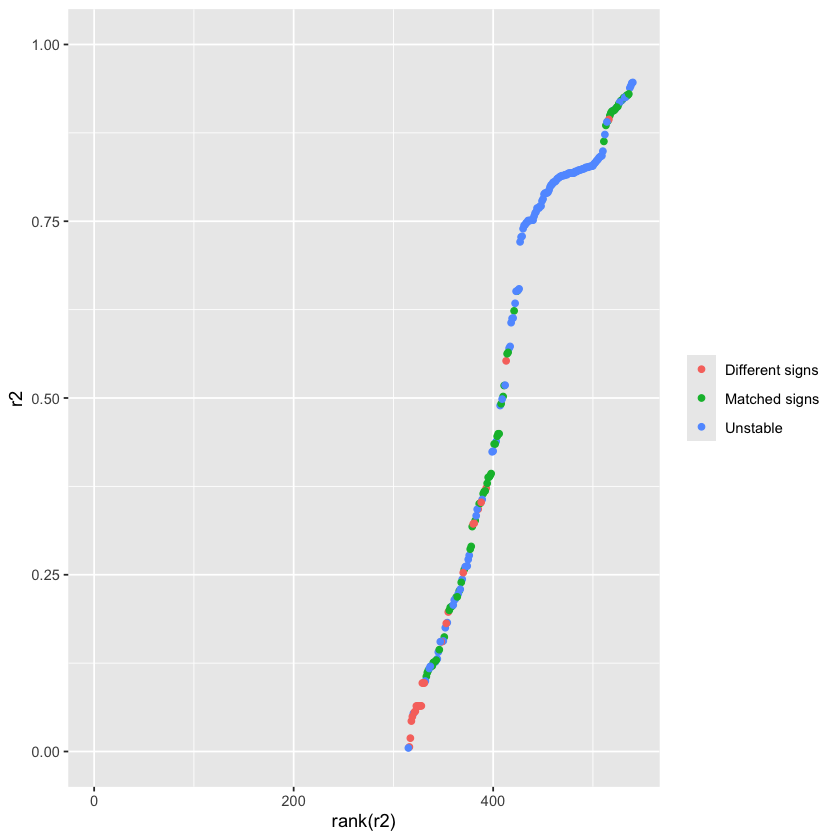

In [92]:
library(ggplot2)
ggplot(results, aes(rank(r2), r2)) +
       geom_point(aes(colour=ifelse(isstable, ifelse(signmatch, "Matched signs", "Different signs"), "Unstable"))) +
    scale_colour_discrete(NULL) + ylim(0, 1)

Write-up at https://paper.dropbox.com/doc/PM2.5-Emulator--Cf7GcmlLS5vmF3ovtq_xR0SrAg-KWJrvf1vX4RC500VP7hlh

# Version 2: EKC?

In [93]:
library(readxl)
library(reshape2)

In [94]:
pmobs = read_excel("../data/sdei-annual-pm2-5-concentrations-countries-urban-areas-v1-1998-2016-xlsx/sdei-annual-pm2-5-concentrations-countries-urban-areas-v1-1998-2016-xlsx.xlsx", sheet=4)

In [95]:
head(pmobs)

CODE,ISO,COUNTRY,AVPMC_2008,AVPMC_2009,AVPMC_2010,AVPMC_2011,AVPMC_2012,AVPMC_2013,AVPMC_2014,AVPMC_2015
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,AFG,Afghanistan,13.26137037,10.50701937,11.92549180,11.96693352,13.40898594,13.0235426,12.202900,15.2331374
8,ALB,Albania,9.91456242,9.01403252,9.72033886,9.99026037,10.26517567,9.6878014,9.354653,11.8006311
12,DZA,Algeria,6.13864964,4.66263226,5.44148669,5.29028024,5.60143102,5.3973197,6.053069,8.6235388
16,ASM,American Samoa,0.09964771,0.09951101,0.09951101,0.09951101,0.09951101,0.1012694,0.199022,0.2972666
20,AND,Andorra,5.69507307,5.48002120,5.17332453,6.07921659,6.22985398,4.6527658,4.823473,5.4824162
24,AGO,Angola,14.96003732,14.97611656,15.69914071,16.21085619,16.26793892,18.9731269,16.105242,17.9665771


In [102]:
pmobs2 = melt(pmobs, names(pmobs)[1:3])

In [103]:
pmobs2$year = as.numeric(substring(pmobs2$variable, 7, 11))

In [104]:
gdppcobs = read_excel("../data/API_NY.GDP.PCAP.PP.KD_DS2_en_excel_v2_76342.xls", skip=3)

In [105]:
gdppcobs2 = melt(gdppcobs, names(gdppcobs)[1:4])

In [106]:
gdppcobs2$year = as.numeric(as.character(gdppcobs2$variable))

In [107]:
head(gdppcobs2)

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value,year
,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Aruba,ABW,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,1960,NA,1960
2,Africa Eastern and Southern,AFE,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,1960,NA,1960
3,Afghanistan,AFG,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,1960,NA,1960
4,Africa Western and Central,AFW,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,1960,NA,1960
5,Angola,AGO,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,1960,NA,1960
6,Albania,ALB,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,1960,NA,1960


In [108]:
popobs = read_excel("../data/API_SP.POP.TOTL_DS2_en_excel_v2_76243.xls", skip=3)
popobs2 = melt(popobs, names(popobs)[1:4])
popobs2$year = as.numeric(as.character(popobs2$variable))

In [109]:
pmobs3 = pmobs2 %>% left_join(gdppcobs2, by=c('year', 'ISO'='Country Code'), suffix=c('.pm', '')) %>%
  left_join(popobs2, by=c('year', 'ISO'='Country Code'), suffix=c('.gdppc', '.pop'))

In [110]:
head(pmobs3)

,CODE,ISO,COUNTRY,variable.pm,value.pm,year,Country Name.gdppc,Indicator Name.gdppc,Indicator Code.gdppc,variable.gdppc,value.gdppc,Country Name.pop,Indicator Name.pop,Indicator Code.pop,variable.pop,value.pop
,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,4,AFG,Afghanistan,AVPMC_2008,13.26137037,2008,Afghanistan,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2008,2191.504,Afghanistan,"Population, total",SP.POP.TOTL,2008,26482622
2,8,ALB,Albania,AVPMC_2008,9.91456242,2008,Albania,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2008,10940.361,Albania,"Population, total",SP.POP.TOTL,2008,2947314
3,12,DZA,Algeria,AVPMC_2008,6.13864964,2008,Algeria,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2008,14206.777,Algeria,"Population, total",SP.POP.TOTL,2008,34816961
4,16,ASM,American Samoa,AVPMC_2008,0.09964771,2008,American Samoa,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2008,NA,American Samoa,"Population, total",SP.POP.TOTL,2008,55828
5,20,AND,Andorra,AVPMC_2008,5.69507307,2008,Andorra,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2008,60691.605,Andorra,"Population, total",SP.POP.TOTL,2008,83495
6,24,AGO,Angola,AVPMC_2008,14.96003732,2008,Angola,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2008,9916.909,Angola,"Population, total",SP.POP.TOTL,2008,21578655


In [111]:
pmobs4 = pmobs3 %>% group_by(ISO) %>% arrange(year) %>%
  mutate(logpm=log(value.pm), laglogpm=lag(logpm), lag2logpm=lag(laglogpm),
        loggdppc=log(value.gdppc), loggdppc2=loggdppc^2, logpop=log(value.pop), year2000=year - 2000)

In [112]:
head(subset(pmobs4, ISO == 'USA'))

CODE,ISO,COUNTRY,variable.pm,value.pm,year,Country Name.gdppc,Indicator Name.gdppc,Indicator Code.gdppc,variable.gdppc,⋯,Indicator Code.pop,variable.pop,value.pop,logpm,laglogpm,lag2logpm,loggdppc,loggdppc2,logpop,year2000
<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
840,USA,United States of America,AVPMC_2008,9.144625,2008,United States,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2008,⋯,SP.POP.TOTL,2008,304093966,2.213166,NA,NA,11.01532,121.3373,19.53285,8
840,USA,United States of America,AVPMC_2009,8.750111,2009,United States,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2009,⋯,SP.POP.TOTL,2009,306771529,2.169066,2.213166,NA,10.98045,120.5703,19.54161,9
840,USA,United States of America,AVPMC_2010,8.754544,2010,United States,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2010,⋯,SP.POP.TOTL,2010,309327143,2.169573,2.169066,2.213166,10.99875,120.9725,19.54991,10
840,USA,United States of America,AVPMC_2011,9.584729,2011,United States,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2011,⋯,SP.POP.TOTL,2011,311583481,2.260171,2.169573,2.169066,11.00700,121.1541,19.55718,11
840,USA,United States of America,AVPMC_2012,8.975186,2012,United States,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2012,⋯,SP.POP.TOTL,2012,313877662,2.194464,2.260171,2.169573,11.02230,121.4911,19.56451,12
840,USA,United States of America,AVPMC_2013,8.928400,2013,United States,"GDP per capita, PPP (constant 2021 international $)",NY.GDP.PCAP.PP.KD,2013,⋯,SP.POP.TOTL,2013,316059947,2.189237,2.194464,2.260171,11.03633,121.8006,19.57144,13


In [113]:
pmobs5 = subset(pmobs4, value.pop > 0)

In [114]:
summary(felm(logpm ~ loggdppc * year2000 + loggdppc2 * year2000 + logpop + laglogpm | factor(ISO) + factor(year2000) + year2000 : factor(ISO), data=pmobs5, weights=pmobs5$value.pop))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or not positive definite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or not positive definite”



Call:
   felm(formula = logpm ~ loggdppc * year2000 + loggdppc2 * year2000 +      logpop + laglogpm | factor(ISO) + factor(year2000) + year2000:factor(ISO),      data = pmobs5, weights = pmobs5$value.pop) 

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3286.9  -149.8    -2.8   135.9  2260.3 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
loggdppc           -0.2036957  2.7732978  -0.073  0.94146   
year2000                  NaN         NA     NaN      NaN   
loggdppc2          -0.0114041  0.1526271  -0.075  0.94045   
logpop              0.4336108  0.7622456   0.569  0.56958   
laglogpm           -0.0933247  0.0342664  -2.724  0.00658 **
loggdppc:year2000   0.0476475  0.2149977   0.222  0.82466   
year2000:loggdppc2 -0.0002551  0.0118309  -0.022  0.98280   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 540.5 on 962 degrees of freedom
  (354 observations deleted due to missingness)
Multiple R-squ

In [115]:
-0.2036957 + 0.0476475 * 10

[1] 0.2727793

In [116]:
-0.0114041 + -0.0002551 * 10

[1] -0.0139551

In [117]:
loggdppcs = seq(min(pmobs5$loggdppc, na.rm=T), max(pmobs5$loggdppc, na.rm=T), length.out=100)

In [118]:
pdf = data.frame(gdppc=exp(loggdppcs), dpmdi=0.2727793 * loggdppcs + -0.0139551 * loggdppcs^2)

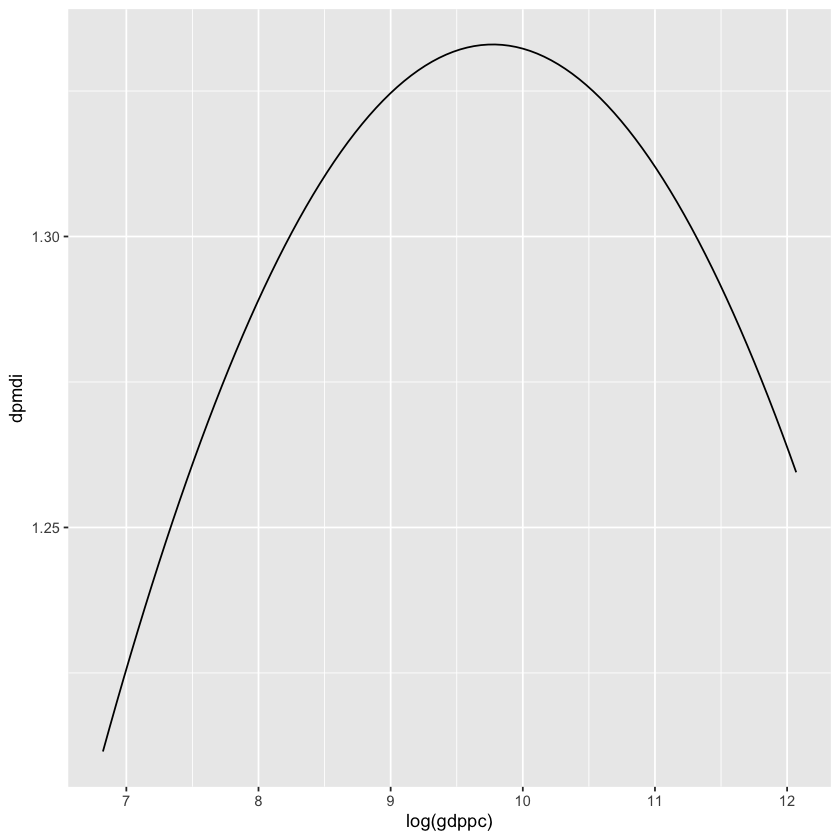

In [119]:
ggplot(pdf, aes(log(gdppc), dpmdi)) + geom_line()

In [129]:
modekc = felm(logpm ~ loggdppc + loggdppc : year2000 + loggdppc2 + loggdppc2 : year2000 + logpop + laglogpm | factor(ISO) + factor(year2000) + year2000 : factor(ISO), data=pmobs5, weights=pmobs5$value.pop)

In [130]:
summary(modekc)


Call:
   felm(formula = logpm ~ loggdppc + loggdppc:year2000 + loggdppc2 +      loggdppc2:year2000 + logpop + laglogpm | factor(ISO) + factor(year2000) +      year2000:factor(ISO), data = pmobs5, weights = pmobs5$value.pop) 

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3286.9  -149.8    -2.8   135.9  2260.3 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
loggdppc           -0.2036957  2.7732978  -0.073  0.94146   
loggdppc2          -0.0114041  0.1526271  -0.075  0.94045   
logpop              0.4336108  0.7622456   0.569  0.56958   
laglogpm           -0.0933247  0.0342664  -2.724  0.00658 **
loggdppc:year2000   0.0476475  0.2149977   0.222  0.82466   
loggdppc2:year2000 -0.0002551  0.0118309  -0.022  0.98280   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 540.5 on 962 degrees of freedom
  (354 observations deleted due to missingness)
Multiple R-squared(full model): 0.9906   Adjusted R-squa